In [1]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/main/MarketPower.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url)

In [4]:
df['q']= (df['theta'] - df['cm'])   /   (2*df['beta'])

In [6]:
df

,Unnamed: 0,theta,beta,cm,sector,q
0,0,125.121419,31.5,9.799712,Software,1.830503
1,1,125.645324,30.5,10.616998,Software,1.885710
2,2,126.766324,17.5,9.426922,Software,3.352554
3,3,127.141536,22.5,9.698818,Software,2.609838
4,4,127.472341,28.5,9.042124,Software,2.077723
...,...,...,...,...,...,...
122,0,1237.516764,24.4,4.306088,Financial,25.270711
123,1,1236.938396,11.4,5.101223,Financial,54.027946
124,2,1235.802773,12.4,4.073056,Financial,49.666521
125,3,1237.271186,23.4,3.709515,Financial,26.358155


In [ ]:
df.reset_index(inplace=True)

In [ ]:
Q = {'Software':0,
     'Diapers':0,
     'Agriculture':0,
     'Financial':0}
for sector in Q:
  for row in df.index:
    if df.loc[row,'sector']==sector:
      Q[sector] =  Q[sector] + df.loc[row,'q']

In [ ]:
df['Q']=0
for sector in Q:
  for row in df.index:
    if df.loc[row,'sector']==sector:
      df.loc[row,'Q']= Q[sector]

In [ ]:
df

,index,Unnamed: 0,theta,beta,cm,sector,q,Q
0,0,0,125.121419,31.5,9.799712,Software,1.830503,113.335900
1,1,1,125.645324,30.5,10.616998,Software,1.885710,113.335900
2,2,2,126.766324,17.5,9.426922,Software,3.352554,113.335900
3,3,3,127.141536,22.5,9.698818,Software,2.609838,113.335900
4,4,4,127.472341,28.5,9.042124,Software,2.077723,113.335900
...,...,...,...,...,...,...,...,...
122,122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295
123,123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295
124,124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295
125,125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295


In [ ]:
#### CALC. ESTADÍSTICAS PARA CADA SECTOR
df['Q'].describe() # this table by sector

count     127.000000
mean     2274.467164
std      1103.970497
min       113.335900
25%      2845.023085
50%      2845.023085
75%      2845.023085
max      2845.023085
Name: Q, dtype: float64

In [ ]:
sectores = df['sector'].unique()
for sector in sectores:
  print("--"*10)
  print(sector)
  print('--'*10)
  print(df[df['sector']==sector]['cm'].describe())

--------------------
Software
--------------------
count    20.000000
mean     10.030047
std       1.184926
min       8.217651
25%       9.128564
50%       9.749265
75%      10.964932
max      11.986355
Name: cm, dtype: float64
--------------------
Diapers
--------------------
count    2.000000
mean     4.322635
std      0.160488
min      4.209153
25%      4.265894
50%      4.322635
75%      4.379376
max      4.436117
Name: cm, dtype: float64
--------------------
Agriculture
--------------------
count    100.000000
mean       6.503434
std        1.230096
min        4.600602
25%        5.397573
50%        6.557229
75%        7.688079
max        8.478236
Name: cm, dtype: float64
--------------------
Financial
--------------------
count    5.000000
mean     4.640864
std      0.922025
min      3.709515
25%      4.073056
50%      4.306088
75%      5.101223
max      6.014435
Name: cm, dtype: float64


In [ ]:
df

,index,Unnamed: 0,theta,beta,cm,sector,q,Q,main
0,0,0,125.121419,31.5,9.799712,Software,1.830503,113.335900,0
1,1,1,125.645324,30.5,10.616998,Software,1.885710,113.335900,0
2,2,2,126.766324,17.5,9.426922,Software,3.352554,113.335900,0
3,3,3,127.141536,22.5,9.698818,Software,2.609838,113.335900,0
4,4,4,127.472341,28.5,9.042124,Software,2.077723,113.335900,0
...,...,...,...,...,...,...,...,...,...
122,122,0,1237.516764,24.4,4.306088,Financial,25.270711,175.602295,0
123,123,1,1236.938396,11.4,5.101223,Financial,54.027946,175.602295,1
124,124,2,1235.802773,12.4,4.073056,Financial,49.666521,175.602295,1
125,125,3,1237.271186,23.4,3.709515,Financial,26.358155,175.602295,1


In [ ]:
df['main']=0
rastrear={}
pos =  []
sectores =  df['sector'].unique()
for sector in sectores:
  indices  = df[df['sector']==sector]['q'].sort_values(ascending=False).head(3).index
  for indice in indices:
    pos.append(indice)
for row in df.index:
  if row in pos:
    df.loc[row,'main']=1
df['main'].value_counts()

0    116
1     11
Name: main, dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='sector', ylabel='q'>

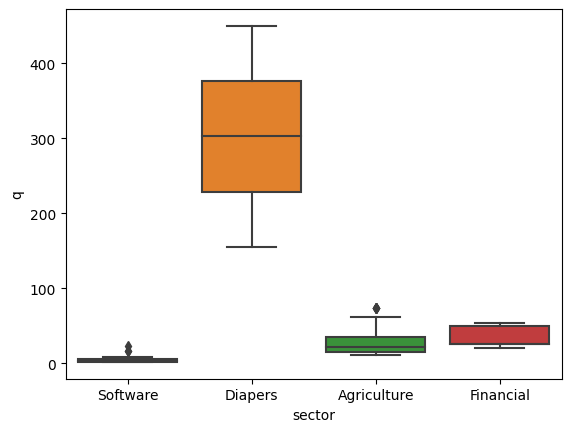

In [ ]:
sns.boxplot(data=df, x="sector", y="q")

<Axes: xlabel='sector', ylabel='q'>

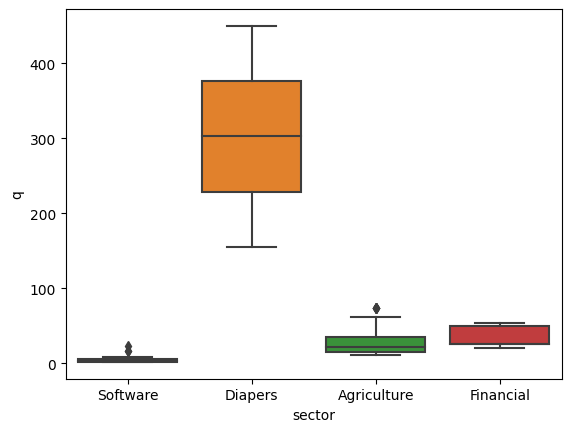

In [ ]:
sns.boxplot(data=df, x="sector", y="q")

In [ ]:
media = df[df['sector']=='Financial']['q'].mean()
desv = df[df['sector']=='Financial']['q'].std()

In [ ]:
info={}
df['zgroup']=0
sectores = df['sector'].unique()
for sector in sectores:
  info[sector] = df[df['sector']==sector]['q'].mean() , df[df['sector']==sector]['q'].std()
for sector in sectores:
  for row in df.index:
    if df.loc[row,'sector']  == sector:
      df.loc[row,'zgroup']=(df.loc[row,'q'] - info[sector][0])/info[sector][1]

<Axes: xlabel='sector', ylabel='zgroup'>

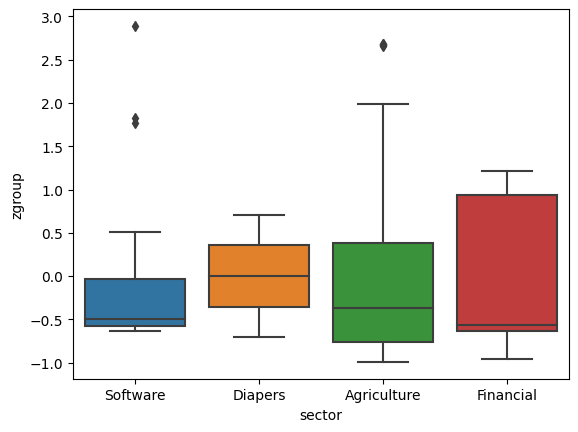

In [ ]:
sns.boxplot(data=df, x="sector", y="zgroup")